# Curvas de Aprendizado

In [1]:
from aurelio.plotter import collect, collect_zip
import os
import pandas as pd
import seaborn as sns

In [3]:
exps = [
    "with_elmo-n:n-glove_100",
    "with_elmo-n:1-glove_100",
    "with_elmo-1:n-glove_100",
    "with_elmo-1:1-glove_100",
    "with_elmo-n:n-glove_0",
    "no_elmo-n:n-glove_100"
]

dfs = {}
for exp in exps:
    if ".zip" not in exp:
        path = "{}/metrics/{}".format(os.getcwd(), exp)
        dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
    else:
        dfs[exp] = pd.DataFrame.from_records(collect_zip(exp, exp))
#dfs["metrics_kfold_dev_reduced_elmo.zip"].head()

In [4]:
def plot_perc(dfs, names, metric):
    dfs = pd.concat([dfs[name] for name in names])
    sns.set(rc={'figure.figsize':(15,10)})
    sns.lineplot(x="perc", y=metric, data=dfs, hue="name")

## Respostas múltiplas vs simples (100% train only): ELMO / k-fold

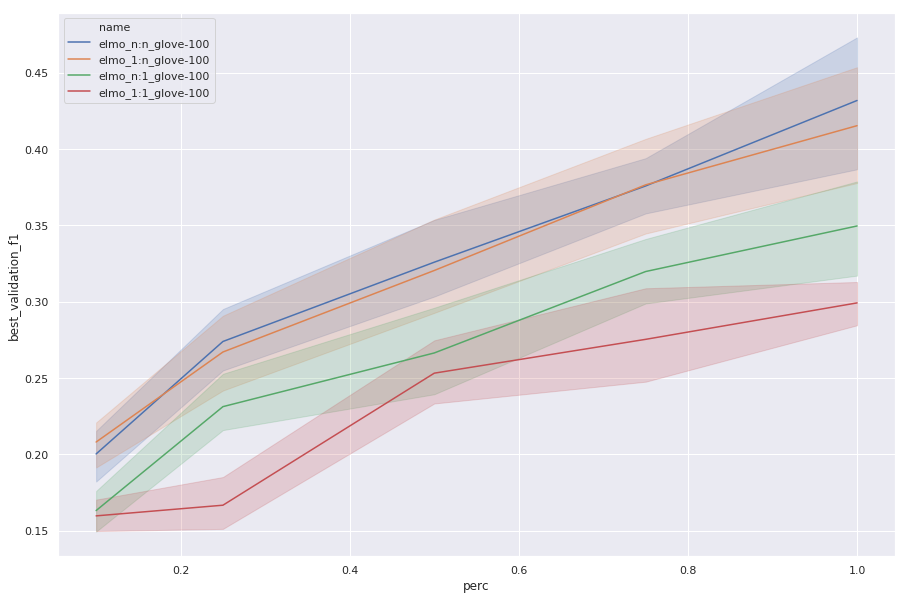

In [5]:
plot_perc(dfs, ["elmo_n:n_glove-100", "elmo_1:n_glove-100", "elmo_n:1_glove-100", "elmo_1:1_glove-100"], "best_validation_f1")

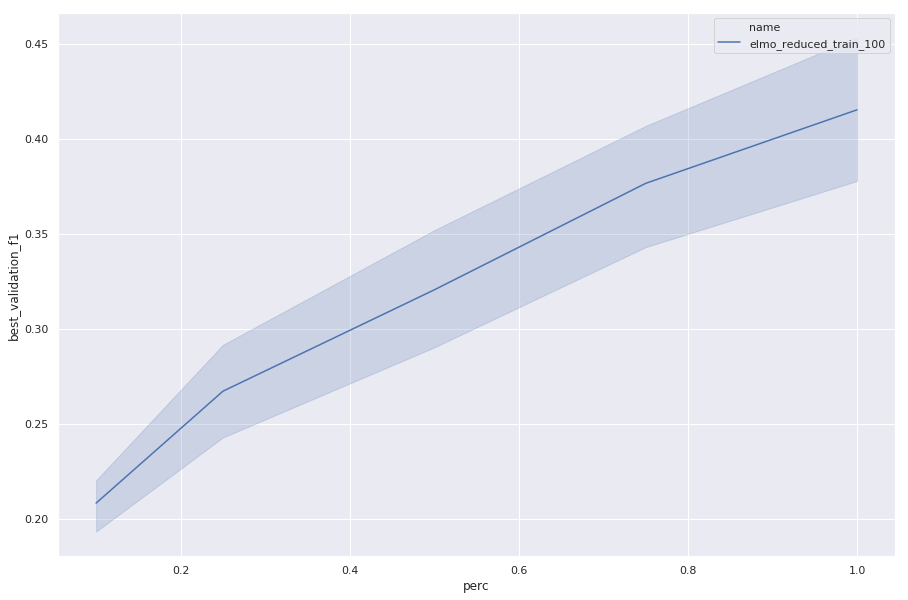

In [9]:
plot_perc(dfs, ["with_elmo-n:n-glove_0", ""], "best_validation_f1")